#Self Organizing Map

##Install MiniSom Package

In [0]:
!pip install MiniSom

### Importing the libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')

In [4]:
print(dataset)

     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213 

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(X)
print(y)

[[1.5776156e+07 1.0000000e+00 2.2080000e+01 ... 2.0000000e+00
  1.0000000e+02 1.2130000e+03]
 [1.5739548e+07 0.0000000e+00 2.2670000e+01 ... 2.0000000e+00
  1.6000000e+02 1.0000000e+00]
 [1.5662854e+07 0.0000000e+00 2.9580000e+01 ... 2.0000000e+00
  2.8000000e+02 1.0000000e+00]
 ...
 [1.5675450e+07 0.0000000e+00 1.8830000e+01 ... 2.0000000e+00
  1.0000000e+02 1.0000000e+00]
 [1.5776494e+07 0.0000000e+00 2.7420000e+01 ... 2.0000000e+00
  1.2000000e+02 1.2000000e+01]
 [1.5592412e+07 1.0000000e+00 4.1000000e+01 ... 1.0000000e+00
  5.6000000e+02 1.0000000e+00]]
[0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1
 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 0
 0 0 1 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 1 1
 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 0 

## Feature Scaling


In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
sc = MinMaxScaler(feature_range = (0, 1))

X = sc.fit_transform(X)
print(X)

[[8.42681467e-01 1.00000000e+00 1.25263158e-01 ... 5.00000000e-01
  5.00000000e-02 1.21200000e-02]
 [6.96090562e-01 0.00000000e+00 1.34135338e-01 ... 5.00000000e-01
  8.00000000e-02 0.00000000e+00]
 [3.88981656e-01 0.00000000e+00 2.38045113e-01 ... 5.00000000e-01
  1.40000000e-01 0.00000000e+00]
 ...
 [4.39420332e-01 0.00000000e+00 7.63909774e-02 ... 5.00000000e-01
  5.00000000e-02 0.00000000e+00]
 [8.44034934e-01 0.00000000e+00 2.05563910e-01 ... 5.00000000e-01
  6.00000000e-02 1.10000000e-04]
 [1.06907888e-01 1.00000000e+00 4.09774436e-01 ... 0.00000000e+00
  2.80000000e-01 0.00000000e+00]]


##Training the SOM


In [8]:
from minisom import MiniSom

In [9]:
som = MiniSom(
    x = 10,
    y = 10,
    input_len = 15,
    sigma = 1.0,
    learning_rate = 0.5
)

In [10]:
som.random_weights_init(X)
som.train_random(
    data = X,
    num_iteration = 100
)

##Visualizing the results


In [11]:
from pylab import bone, pcolor, colorbar, plot, show

In [3]:
print(dataset)

     CustomerID  A1     A2      A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
0      15776156   1  22.08  11.460   2   4   4  1.585   0   0    0    1    2   
1      15739548   0  22.67   7.000   2   8   4  0.165   0   0    0    0    2   
2      15662854   0  29.58   1.750   1   4   4  1.250   0   0    0    1    2   
3      15687688   0  21.67  11.500   1   5   3  0.000   1   1   11    1    2   
4      15715750   1  20.17   8.170   2   6   4  1.960   1   1   14    0    2   
..          ...  ..    ...     ...  ..  ..  ..    ...  ..  ..  ...  ...  ...   
685    15808223   1  31.57  10.500   2  14   4  6.500   1   0    0    0    2   
686    15769980   1  20.67   0.415   2   8   4  0.125   0   0    0    0    2   
687    15675450   0  18.83   9.540   2   6   4  0.085   1   0    0    0    2   
688    15776494   0  27.42  14.500   2  14   8  3.085   1   1    1    0    2   
689    15592412   1  41.00   0.040   2  10   4  0.040   0   1    1    0    1   

     A13   A14  Class  
0    100  1213 

In [12]:
from pylab import bone, pcolor, colorbar, plot, show

In [13]:
bone()

<Figure size 432x288 with 0 Axes>

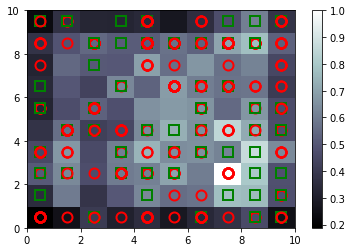

In [16]:
pcolor(
    som.distance_map().T
)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(
        w[0] + 0.5, 
        w[1] + 0.5,
        markers[y[i]],
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2
    )
show()

## Finding the frauds


##Printing the Fraunch Clients

In [17]:
mappings = som.win_map(X)

In [18]:
frauds = np.concatenate((mappings[(8,1)], mappings[(6,8)]), axis = 0)
frauds = sc.inverse_transform(frauds)
print(frauds)

[[1.5571081e+07 1.0000000e+00 2.2670000e+01 1.0500000e+01 2.0000000e+00
  1.1000000e+01 8.0000000e+00 1.3350000e+00 1.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 2.0000000e+00 1.0000000e+02 1.0000000e+00]
 [1.5636767e+07 1.0000000e+00 2.3420000e+01 1.0000000e+00 2.0000000e+00
  8.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 2.8000000e+02 1.0000000e+00]
 [1.5603683e+07 1.0000000e+00 2.0670000e+01 8.3500000e-01 1.0000000e+00
  8.0000000e+00 4.0000000e+00 2.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 2.4000000e+02 1.0000000e+00]
 [1.5659100e+07 1.0000000e+00 1.9170000e+01 0.0000000e+00 1.0000000e+00
  7.0000000e+00 5.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 1.0000000e+00 1.0000000e+00 5.0000000e+02 2.0000000e+00]
 [1.5648681e+07 1.0000000e+00 2.3000000e+01 7.5000000e-01 2.0000000e+00
  7.0000000e+00 4.0000000e+00 5.0000000e-01 0.0000000e+00 0.